**Complex Data Transformation and Analysis**

**Task:** Given a complex, multi-dimensional dataset, apply advanced transformation and analysis techniques to extract meaningful insights.

**Objective:** This exercise aims to test your ability to think creatively and apply various SciPy and NumPy functions in a complex, real-world-like scenario.

**Dataset:** A dataset representing a scientific experiment with multiple variables (e.g., temperature, pressure, and chemical concentration) measured over time. The dataset should have at least 1000 entries and multiple variables.

**Dataset creation code:**

import numpy as np

import pandas as pd

# Seed for reproducibility

np.random.seed(0)

# Number of entries

n_entries = 1000

# Simulating dataset

time = np.linspace(0, 100, n_entries)  # Time variable

temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)

pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)

chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({

    'Time': time,

    'Temperature': temperature,

    'Pressure': pressure,

    'Chemical Concentration':
    chemical_concentration
})


**first 5 (possible) rows:**

     Time  Temperature     Pressure  Chemical Concentration
0  0.0000    20.882026  1033.555963                4.693416
1  0.1001    20.231526  1033.890892                4.720490
2  0.2002    20.552262  1032.571356                5.134934
3  0.3003    21.214783  1033.090475                4.996730
4  0.4004    21.059555  1033.202742                5.234754


**Challenges:**
**1. Data Transformation:**

**Goal:** Prepare the data for analysis by applying transformations.

**Steps and Hints:**

**Normalization:** Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.

**Logarithmic Scaling (Optional):** Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.

**Fourier Transformation:** Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.

**Tools: **Explore np.fft.fft for Fourier transformation.

**2. Statistical Analysis:**

**Goal:** Extract statistical insights from the data.

**Steps and Hints:**
**Descriptive Statistics:** Use pandas describe() function to get an overview of the data.

**Correlation Analysis:** Calculate and interpret the correlation between variables using pandas corr() function.

**Inferential Statistics:** Consider conducting hypothesis tests or regression analysis to draw deeper insights.

**Tools:** Explore scipy.stats for advanced statistical functions.

**3. Data Visualization:**

**Goal:** Create visual representations of your findings.

**Steps and Hints:**

**Heatmaps:** Use heatmaps to visualize correlation matrices. This can be done with seaborn.

**Multi-dimensional Scatter Plots:** Create scatter plots for pairs of variables to explore their relationships. seaborn’s pairplot is useful here.

**Fourier Transform Visualizations:** Plot the amplitude vs. frequency graphs for the Fourier transformed data.

**Tools:** Utilize matplotlib and seaborn for creating plots.

**4. Interpretation:**

**Goal:** Write a brief report interpreting the results of your analyses.

**Steps and Hints:**
**Discuss Findings:** Interpret the results of your statistical analyses and visualizations. Consider real-world implications or applications of your findings.

**Relate to Real-World:** Think about how these insights can be applied in practical scenarios or how they align with theoretical knowledge.

**Reflect on the Process:** Comment on what the data transformations and analyses reveal about the nature of the dataset.

**Additional Hints:**

Begin by exploring the dataset through basic visualizations like histograms or line plots to understand its nature.

Think creatively about how different transformations might reveal hidden patterns or simplify the analysis.

Consider the relationships between different variables and how they might interact over time.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.fft import fft, fftfreq

# Seed for reproducibility
np.random.seed(0)

# Generate Dataset
n_entries = 1000
time = np.linspace(0,100, n_entries)
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)

# Create Dataframe
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [8]:
# Descriptive Statistics
print('Descriptive Statistics:\n', ninja_data.describe())

Descriptive Statistics:
               Time  Temperature     Pressure  Chemical Concentration
count  1000.000000  1000.000000  1000.000000             1000.000000
mean     50.000000    19.977372  1013.033617                4.989754
std      28.910854     3.574943    14.203350                1.436505
min       0.000000    13.897407   990.284418                2.559310
25%      25.000000    16.386984   998.852247                3.576024
50%      50.000000    20.008666  1012.950967                4.970976
75%      75.000000    23.570373  1027.062114                6.398067
max     100.000000    26.030294  1035.471676                7.486763


In [10]:
# Normalization
normalized_data = ninja_data.copy()
for col in ['Temperature', 'Pressure', 'Chemical Concentration']:
  mean = ninja_data[col].mean()
  std = ninja_data[col].std()
  normalized_data[col] = (ninja_data[col] - mean) / std

normalized_data

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,0.253054,1.444895,-0.206291
1,0.1001,0.071093,1.468476,-0.187444
2,0.2002,0.160811,1.375573,0.101064
3,0.3003,0.346135,1.412122,0.004856
4,0.4004,0.302714,1.420026,0.170552
...,...,...,...,...
995,99.5996,0.028892,1.410852,0.121938
996,99.6997,-0.047807,1.503425,-0.250366
997,99.7998,0.001911,1.416461,-0.107164
998,99.8999,-0.162974,1.325244,-0.205458


In [11]:
# Correlation Matrix
correlation_matrix = ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']].corr()
print('\nCorrelation Matrix:\n', correlation_matrix)


Correlation Matrix:
                         Temperature  Pressure  Chemical Concentration
Temperature                1.000000  0.007112               -0.003277
Pressure                   0.007112  1.000000               -0.000863
Chemical Concentration    -0.003277 -0.000863                1.000000


In [13]:
# Fourier Transformations
fft_temp = np.abs(fft(normalized_data['Temperature'].values))
fft_pres = np.abs(fft(normalized_data['Pressure'].values))
fft_chem = np.abs(fft(normalized_data['Chemical Concentration'].values))
frequencies = fftfreq(n_entries, d=(time[1] - time[0]))

frequencies

array([ 0.     ,  0.00999,  0.01998,  0.02997,  0.03996,  0.04995,
        0.05994,  0.06993,  0.07992,  0.08991,  0.0999 ,  0.10989,
        0.11988,  0.12987,  0.13986,  0.14985,  0.15984,  0.16983,
        0.17982,  0.18981,  0.1998 ,  0.20979,  0.21978,  0.22977,
        0.23976,  0.24975,  0.25974,  0.26973,  0.27972,  0.28971,
        0.2997 ,  0.30969,  0.31968,  0.32967,  0.33966,  0.34965,
        0.35964,  0.36963,  0.37962,  0.38961,  0.3996 ,  0.40959,
        0.41958,  0.42957,  0.43956,  0.44955,  0.45954,  0.46953,
        0.47952,  0.48951,  0.4995 ,  0.50949,  0.51948,  0.52947,
        0.53946,  0.54945,  0.55944,  0.56943,  0.57942,  0.58941,
        0.5994 ,  0.60939,  0.61938,  0.62937,  0.63936,  0.64935,
        0.65934,  0.66933,  0.67932,  0.68931,  0.6993 ,  0.70929,
        0.71928,  0.72927,  0.73926,  0.74925,  0.75924,  0.76923,
        0.77922,  0.78921,  0.7992 ,  0.80919,  0.81918,  0.82917,
        0.83916,  0.84915,  0.85914,  0.86913,  0.87912,  0.88

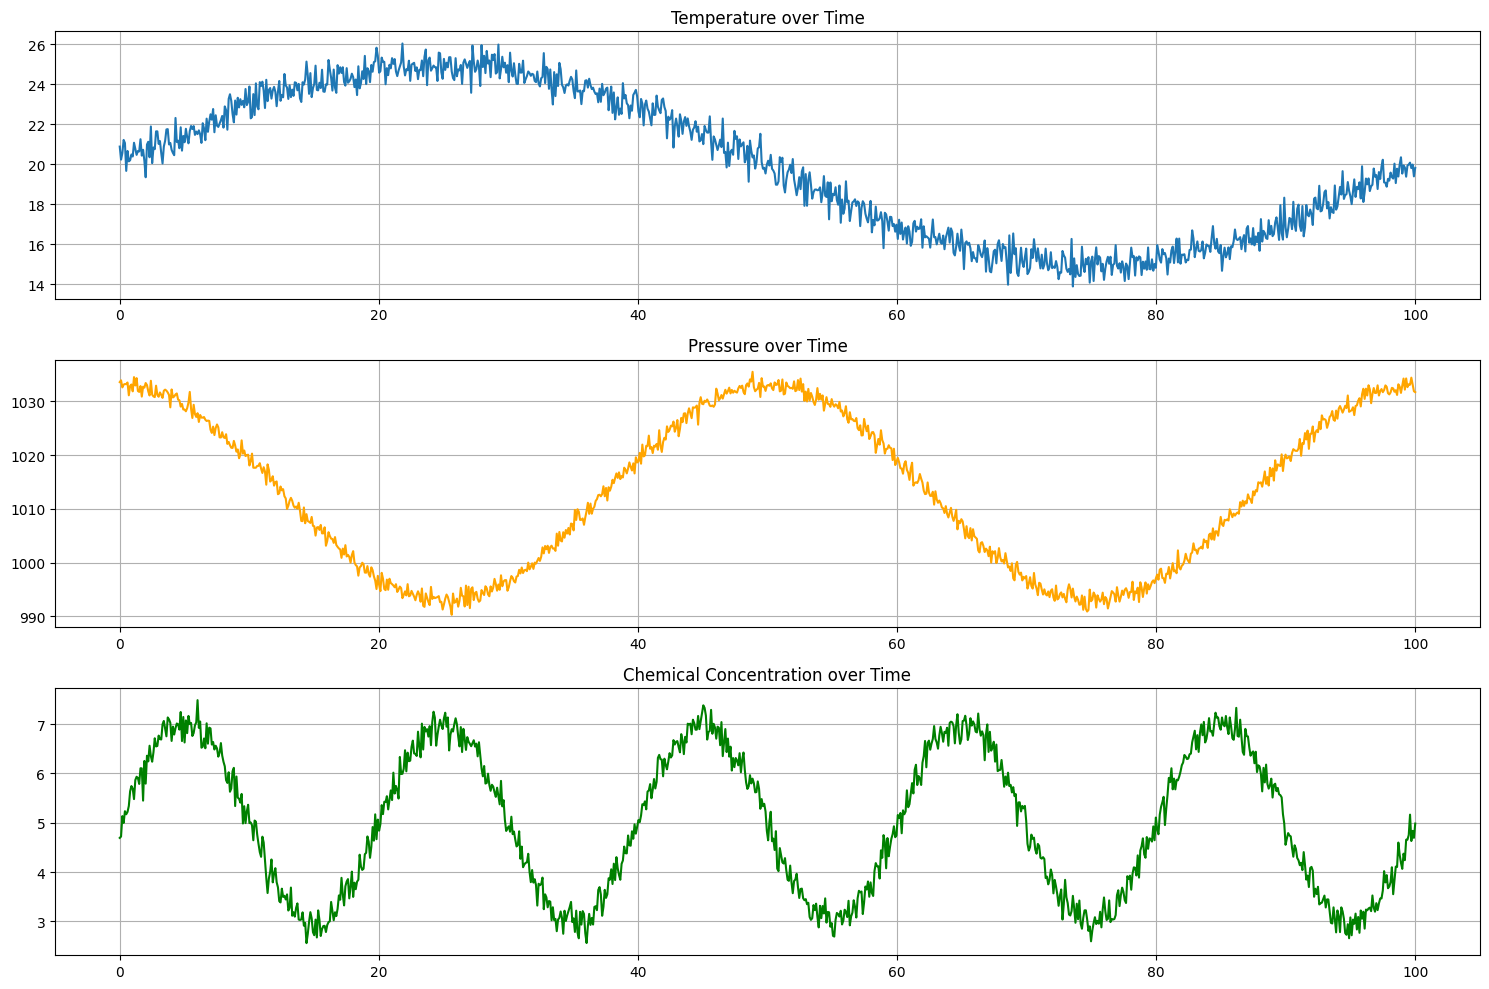

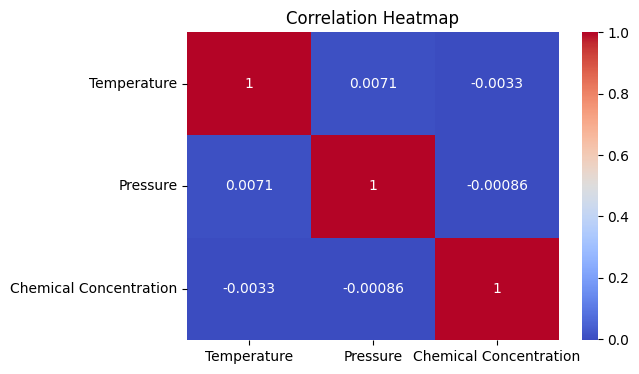

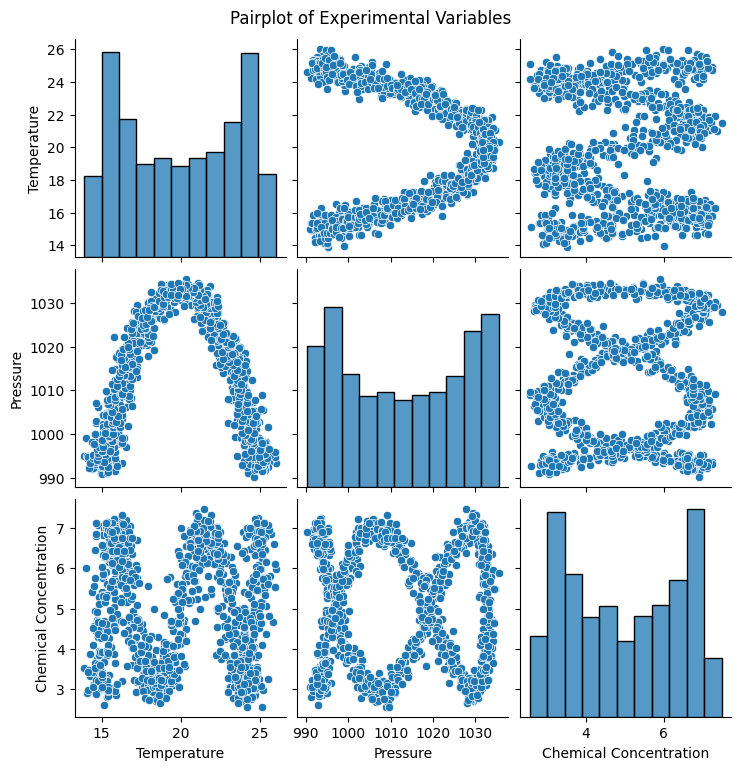

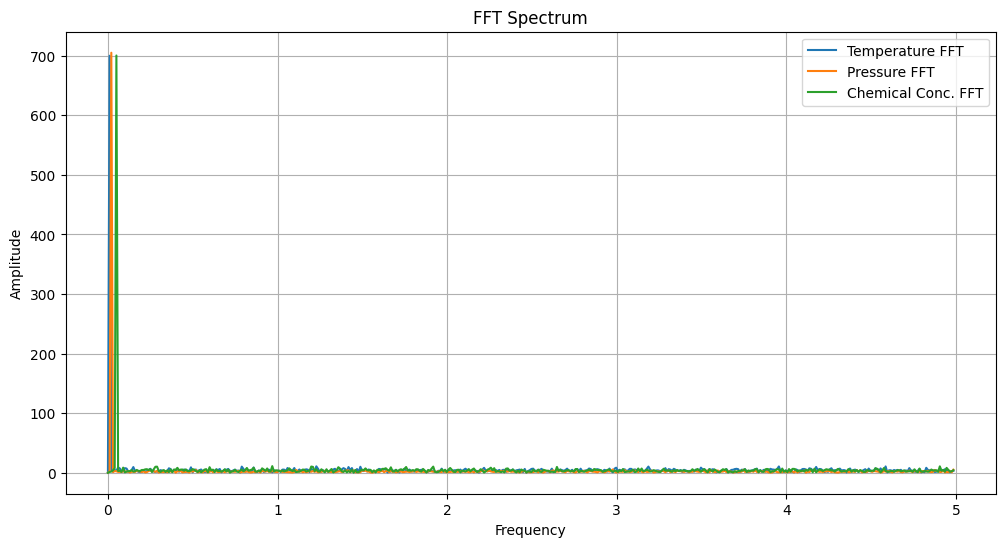

In [14]:
# Plots
plt.figure(figsize=(15, 10))

# Line plots
plt.subplot(3, 1, 1)
plt.plot(time, temperature, label='Temperature')
plt.title('Temperature over Time')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, pressure, label='Pressure', color='orange')
plt.title('Pressure over Time')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, chemical_concentration, label='Chemical Concentration', color='green')
plt.title('Chemical Concentration over Time')
plt.grid()
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']])
plt.suptitle("Pairplot of Experimental Variables", y=1.02)
plt.show()

# FFT Spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:n_entries // 2], fft_temp[:n_entries // 2], label='Temperature FFT')
plt.plot(frequencies[:n_entries // 2], fft_pres[:n_entries // 2], label='Pressure FFT')
plt.plot(frequencies[:n_entries // 2], fft_chem[:n_entries // 2], label='Chemical Conc. FFT')
plt.title('FFT Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()